In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
import numpy as np

In [2]:
np.random.seed(42)

In [3]:
wine_dataset = load_wine()

In [4]:
wine_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [5]:
print(wine_dataset["DESCR"])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [6]:
df = pd.DataFrame(wine_dataset["data"], columns=wine_dataset["feature_names"])

df["target"] = wine_dataset["target"]

print("Shape :", df.shape)

df.head()

Shape : (178, 14)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


# Data Exploration

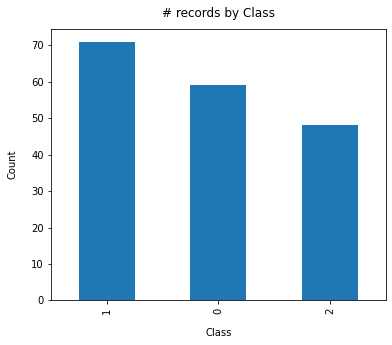

In [7]:
df.target.astype(str).value_counts().plot(kind='bar', figsize=(6, 5))
plt.xlabel("Class", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title("# records by Class", y=1.02)
plt.show()

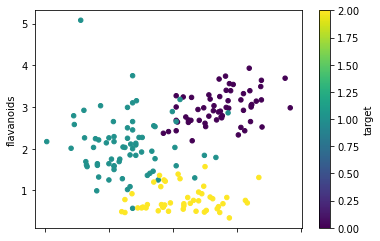

In [8]:
df.plot.scatter(x="alcohol", y="flavanoids", c="target", colormap='viridis')
plt.show()

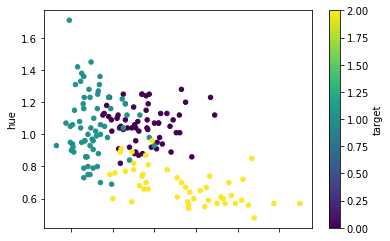

In [9]:
df.plot.scatter(x="color_intensity", y="hue", c="target", colormap='viridis')
plt.show()

In [10]:
features = ["alcohol", "flavanoids", "proline", "color_intensity", "hue"]

# Train Test Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X, y = df[features], df["target"]

In [13]:
X.shape, y.shape

((178, 5), (178,))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Training

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
clf = RandomForestClassifier(n_estimators=20)

In [17]:
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

# Evaluation

In [18]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [19]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

**Train :**

In [20]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00        40

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142



**Test :**

In [21]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36



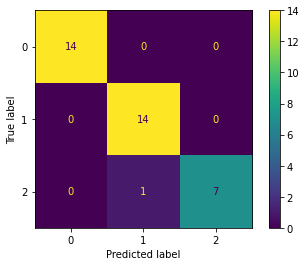

In [22]:
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

# Save Model

In [23]:
import joblib
import json

In [24]:
feature_names = X.columns.to_list()

print(feature_names)

['alcohol', 'flavanoids', 'proline', 'color_intensity', 'hue']


In [25]:
with open("features.json", "w") as f:
    json.dump(feature_names, f, indent=4)

In [26]:
with open("classifier.joblib", "wb") as f:
    joblib.dump(clf, f)

# Test

In [27]:
sample_idx = np.random.randint(len(X_test))

print("Class: ", y_test.iloc[sample_idx])
print("Predicted Class: ", y_pred_test[sample_idx])
print()
print(json.dumps(X_test.iloc[sample_idx].to_dict(), indent=4))

Class:  1
Predicted Class:  1

{
    "alcohol": 12.37,
    "flavanoids": 2.45,
    "proline": 342.0,
    "color_intensity": 2.12,
    "hue": 0.89
}


In [28]:
pd.DataFrame([X_test.iloc[sample_idx].to_dict()])

,alcohol,flavanoids,proline,color_intensity,hue
0,12.37,2.45,342.0,2.12,0.89
